<a href="https://colab.research.google.com/github/FitriSulistiawati/BiodataSederhana/blob/main/PCDSobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-d31971a3f9ee>:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('/content/foto.jpg')


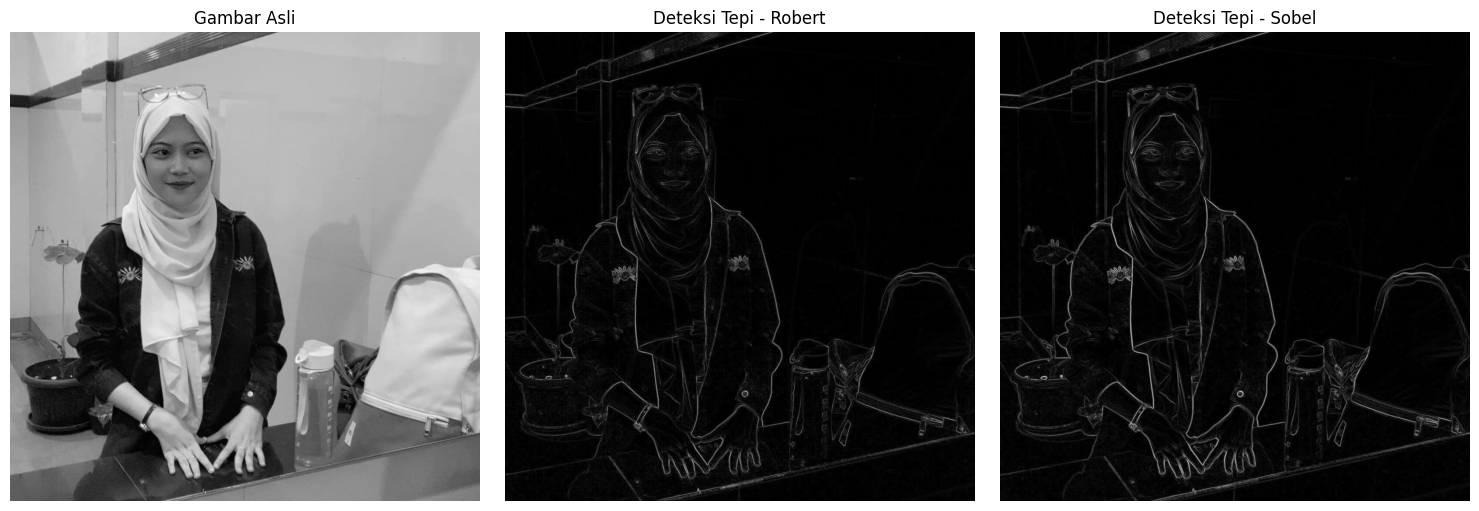

Analisis Perbandingan:
1. Operator Robert cenderung lebih sensitif terhadap detail lokal gambar, tetapi lebih rentan terhadap noise.
2. Operator Sobel lebih halus dalam mendeteksi tepi karena menggabungkan informasi dari arah horizontal dan vertikal.
3. Hasil deteksi tepi dengan operator Sobel biasanya lebih stabil dan lebih efektif dalam mendeteksi tepi pada gambar yang lebih besar.


In [5]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Fungsi untuk deteksi tepi menggunakan operator Robert
def roberts_edge_detection(image):
    # Kernel Robert untuk perhitungan gradien
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    # Menghitung gradien menggunakan konvolusi
    grad_x = convolve(image, kernel_x)
    grad_y = convolve(image, kernel_y)

    # Menghitung magnitude gradien (deteksi tepi)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return magnitude

# Fungsi untuk deteksi tepi menggunakan operator Sobel
def sobel_edge_detection(image):
    # Kernel Sobel untuk perhitungan gradien
    kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Menghitung gradien menggunakan konvolusi
    grad_x = convolve(image, kernel_sobel_x)
    grad_y = convolve(image, kernel_sobel_y)

    # Menghitung magnitude gradien (deteksi tepi)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return magnitude

# Membaca gambar menggunakan imageio
image = imageio.imread('/content/foto.jpg')
# Mengkonversi gambar menjadi grayscale jika gambar berwarna
if image.ndim == 3:
    image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])  # Konversi ke grayscale

# Menggunakan deteksi tepi dengan operator Robert
edges_roberts = roberts_edge_detection(image)

# Menggunakan deteksi tepi dengan operator Sobel
edges_sobel = sobel_edge_detection(image)

# Menampilkan hasilnya
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Menampilkan gambar asli
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Gambar Asli")
axes[0].axis('off')

# Menampilkan hasil deteksi tepi dengan operator Robert
axes[1].imshow(edges_roberts, cmap='gray')
axes[1].set_title("Deteksi Tepi - Robert")
axes[1].axis('off')

# Menampilkan hasil deteksi tepi dengan operator Sobel
axes[2].imshow(edges_sobel, cmap='gray')
axes[2].set_title("Deteksi Tepi - Sobel")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Analisis Perbandingan
print("Analisis Perbandingan:")
print("1. Operator Robert cenderung lebih sensitif terhadap detail lokal gambar, tetapi lebih rentan terhadap noise.")
print("2. Operator Sobel lebih halus dalam mendeteksi tepi karena menggabungkan informasi dari arah horizontal dan vertikal.")
print("3. Hasil deteksi tepi dengan operator Sobel biasanya lebih stabil dan lebih efektif dalam mendeteksi tepi pada gambar yang lebih besar.")
